In [ ]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Research Question 1:** Does race and area of arrest influence strip search rate?(two-way anova)


## **Preprocessing and Data Cleaning**

In [ ]:
# Create dataframe
df=pd.read_csv('/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

In [ ]:
# Select columns for analysis
df= df[["EventID","Perceived_Race","StripSearch","ArrestLocDiv"]]
df.head()

,EventID,Perceived_Race,StripSearch,ArrestLocDiv
0,1005907,White,0,54
1,1014562,White,0,54
2,1029922,Unknown or Legacy,0,54
3,1052190,Black,0,XX
4,1015512,South Asian,0,XX


In [ ]:
# Determine unique variables in ArresLocDiv
df["ArrestLocDiv"].unique()

array(['54', 'XX', '42', '52', '14', '51', '53', '31', '11', '12', '13',
       '41', '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
#Remove Arrest Loc Div values == XX
df = df[(df["ArrestLocDiv"]!='XX')]

In [ ]:
df["ArrestLocDiv"].unique()

array(['54', '42', '52', '14', '51', '53', '31', '11', '12', '13', '41',
       '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
# Filter for Perceived Races
race= ['White','Black','Indigenous']
df = df[df['Perceived_Race'].isin(race)]

In [ ]:
df['Perceived_Race'].unique()

array(['White', 'Black', 'Indigenous'], dtype=object)

In [ ]:
df.head()

,EventID,Perceived_Race,StripSearch,ArrestLocDiv
0,1005907,White,0,54
1,1014562,White,0,54
6,1035445,Black,0,52
9,1012287,Black,0,14
10,1056655,Black,0,51


In [ ]:
#Determine number of arrests by police division and race
arrests=df.groupby(['ArrestLocDiv','Perceived_Race'])['ArrestLocDiv'].count().reset_index(name="Num_Arrests")

In [ ]:
arrests.head()

,ArrestLocDiv,Perceived_Race,Num_Arrests
0,11,Black,401
1,11,Indigenous,51
2,11,White,931
3,12,Black,804
4,12,Indigenous,48


In [ ]:
#Determine number of strip search by police division and race
stripsearch=df.groupby(['ArrestLocDiv','Perceived_Race'])['StripSearch'].sum().reset_index(name="Num_Strip")

In [ ]:
stripsearch.head()

,ArrestLocDiv,Perceived_Race,Num_Strip
0,11,Black,56
1,11,Indigenous,10
2,11,White,124
3,12,Black,131
4,12,Indigenous,8


In [ ]:
# Join two tables
join=pd.merge(arrests,stripsearch)
join.head()

,ArrestLocDiv,Perceived_Race,Num_Arrests,Num_Strip
0,11,Black,401,56
1,11,Indigenous,51,10
2,11,White,931,124
3,12,Black,804,131
4,12,Indigenous,48,8


In [ ]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ArrestLocDiv    51 non-null     object
 1   Perceived_Race  51 non-null     object
 2   Num_Arrests     51 non-null     int64 
 3   Num_Strip       51 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
# Calculate Strip Search Rate
join["StripRate"]= join["Num_Strip"].div(join["Num_Arrests"])
join.head()

,ArrestLocDiv,Perceived_Race,Num_Arrests,Num_Strip,StripRate
0,11,Black,401,56,0.139651
1,11,Indigenous,51,10,0.196078
2,11,White,931,124,0.133190
3,12,Black,804,131,0.162935
4,12,Indigenous,48,8,0.166667


In [ ]:
join.head(100)

,ArrestLocDiv,Perceived_Race,Num_Arrests,Num_Strip,StripRate
0,11,Black,401,56,0.139651
1,11,Indigenous,51,10,0.196078
2,11,White,931,124,0.133190
3,12,Black,804,131,0.162935
4,12,Indigenous,48,8,0.166667
5,12,White,640,109,0.170313
6,13,Black,207,31,0.149758
7,13,Indigenous,52,7,0.134615
8,13,White,554,67,0.120939
9,14,Black,720,181,0.251389


In [ ]:
# Assign numerical values to ArrestLocDiv
value_map = {'54': 0, '42': 0, '52': 1, '14':1, '51':1, '31': 2, '11': 2, '12':2, '13': 1,'41':0,'22':2,'55':0,'43':0,'23':2,'33':1,'32':1, '53':1}
join['AreaCd']=join['ArrestLocDiv'].apply(lambda x: value_map.get(x))
join.loc[:,['AreaCd', 'ArrestLocDiv']]

,AreaCd,ArrestLocDiv
0,2,11
1,2,11
2,2,11
3,2,12
4,2,12
5,2,12
6,1,13
7,1,13
8,1,13
9,1,14


In [ ]:
# Assign text values to ArrestLocDiv
value_map = {'54': 'East', '42': 'East', '52': 'Central', '14':'Central', '51':'Central', '31': 'West', '11': 'West', '12':'West', '13': 'Central','41':'East','22':'West','55':'East','43':'East','23':'West','33':'Central','32':'Central', '53':'Central'}
join['Area']=join['ArrestLocDiv'].apply(lambda x: value_map.get(x))
join.loc[:,['Area', 'ArrestLocDiv']]

,Area,ArrestLocDiv
0,West,11
1,West,11
2,West,11
3,West,12
4,West,12
5,West,12
6,Central,13
7,Central,13
8,Central,13
9,Central,14


In [ ]:
# Assign numerical values to Perceived Race
value_map_a = {'White': 0, 'Black': 1, 'Indigenous': 2}
join['RaceID']=join['Perceived_Race'].apply(lambda x: value_map_a.get(x))
join.loc[:,['RaceID', 'Perceived_Race']]

,RaceID,Perceived_Race
0,1,Black
1,2,Indigenous
2,0,White
3,1,Black
4,2,Indigenous
5,0,White
6,1,Black
7,2,Indigenous
8,0,White
9,1,Black


In [ ]:
join.head()

,ArrestLocDiv,Perceived_Race,Num_Arrests,Num_Strip,StripRate,AreaCd,Area,RaceID
0,11,Black,401,56,0.139651,2,West,1
1,11,Indigenous,51,10,0.196078,2,West,2
2,11,White,931,124,0.133190,2,West,0
3,12,Black,804,131,0.162935,2,West,1
4,12,Indigenous,48,8,0.166667,2,West,2


In [ ]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArrestLocDiv    51 non-null     object 
 1   Perceived_Race  51 non-null     object 
 2   Num_Arrests     51 non-null     int64  
 3   Num_Strip       51 non-null     int64  
 4   StripRate       51 non-null     float64
 5   AreaCd          51 non-null     int64  
 6   Area            51 non-null     object 
 7   RaceID          51 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.6+ KB


## **Exploratory Data Analysis**

Text(34.46263888888889, 0.5, 'Percentage of Strip Search')

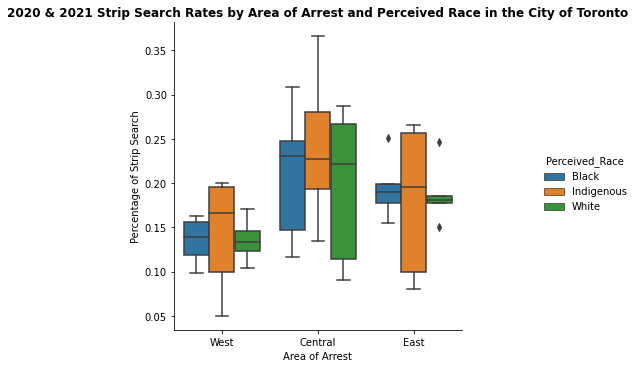

In [ ]:
# Create box plot
sns.catplot(data=join, kind="box", x="Area", y="StripRate", hue='Perceived_Race')
plt.title('2020 & 2021 Strip Search Rates by Area of Arrest and Perceived Race in the City of Toronto', fontweight='bold')
plt.xlabel('Area of Arrest')
plt.ylabel('Percentage of Strip Search')

Text(0, 0.5, 'Frequency')

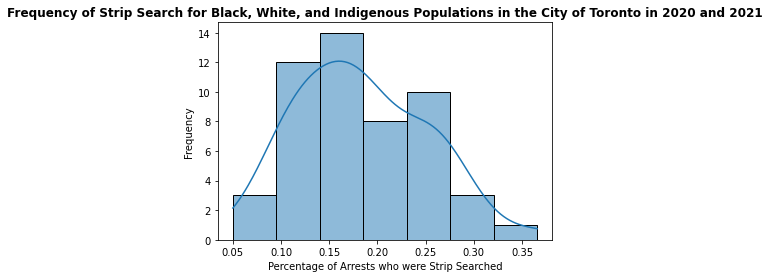

In [ ]:
# Create histogram
sns.histplot(data=join, x='StripRate', kde='True')
plt.title('Frequency of Strip Search for Black, White, and Indigenous Populations in the City of Toronto in 2020 and 2021', fontweight='bold')
plt.xlabel('Percentage of Arrests who were Strip Searched')
plt.ylabel('Frequency')

In [ ]:
# Determine skew of strip search
join.skew()
## Strip rate is approximately symmetrical because skewness is between -0.5 and 0.5

<ipython-input-25-8ae3f96ba2ce>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  join.skew()


ArrestLocDiv   -0.153797
Num_Arrests     1.288239
Num_Strip       2.485048
StripRate       0.386598
AreaCd          0.000000
RaceID          0.000000
dtype: float64

In [ ]:
# Levene test to check homogeneity of variances 
t1 = join.query('Perceived_Race == "White" & Area=="West"')['StripRate']
t2 = join.query('Perceived_Race == "White" & Area=="Central"')['StripRate']
t3 = join.query('Perceived_Race == "White" & Area=="East"')['StripRate']
t4 = join.query('Perceived_Race == "Black" & Area=="West"')['StripRate']
t5 = join.query('Perceived_Race == "Black" & Area=="Central"')['StripRate']
t6 = join.query('Perceived_Race == "Black" & Area=="East"')['StripRate']
t7 = join.query('Perceived_Race == "Indigenous" & Area=="West"')['StripRate']
t8 = join.query('Perceived_Race == "Indigenous" & Area=="Central"')['StripRate']
t9 = join.query('Perceived_Race == "Indigenous" & Area=="East"')['StripRate']

In [ ]:
## p > 0.05 can assume equal variance
stat, p = levene(t1, t2, t3, t4, t5, t6, t7, t8, t9)
print(stat, p)

1.9237408965056952 0.0815763146141901


In [ ]:
# t test for H0: there is no difference in strip search rate between Black and White
stats.ttest_ind(join['StripRate'][join['Perceived_Race'] == 'White'],
                join['StripRate'][join['Perceived_Race'] == 'Black'])

Ttest_indResult(statistic=-0.34112814584036943, pvalue=0.7352368940336633)

In [ ]:
# t test for H0: there is no difference in strip search rate between White and Indigenous
stats.ttest_ind(join['StripRate'][join['Perceived_Race'] == 'White'],
                join['StripRate'][join['Perceived_Race'] == 'Indigenous'])

Ttest_indResult(statistic=-0.7233116937870505, pvalue=0.4747427164809247)

In [ ]:
# t test for H0: there is no difference in strip search rate between Indigenous and Black
stats.ttest_ind(join['StripRate'][join['Perceived_Race'] == 'Indigenous'],
                join['StripRate'][join['Perceived_Race'] == 'Black'])

Ttest_indResult(statistic=0.4560442303270941, pvalue=0.6514381926065097)

In [ ]:
# t test for H0: there is no difference in strip search rate and area of arrest East and West
stats.ttest_ind(join['StripRate'][join['Area'] == 'East'],
                join['StripRate'][join['Area'] == 'West'])

Ttest_indResult(statistic=2.8733660155542284, pvalue=0.0076649218795662565)

In [ ]:
# t test for H0: there is no difference in strip search rate and area of arrest East and Central
stats.ttest_ind(join['StripRate'][join['Area'] == 'East'],
                join['StripRate'][join['Area'] == 'Central'])

Ttest_indResult(statistic=-1.136931029108057, pvalue=0.2635167627793364)

In [ ]:
# t test for H0: there is no difference in strip search rate and area of arrest West and Central
stats.ttest_ind(join['StripRate'][join['Area'] == 'West'],
                join['StripRate'][join['Area'] == 'Central'])

Ttest_indResult(statistic=-3.5175700711735174, pvalue=0.0012585604171511389)

##**Methodology Two-Way ANOVA**

In [ ]:
# Select columns for analysis
join= join[["Area","Perceived_Race","StripRate"]]
join.head()

,Area,Perceived_Race,StripRate
0,West,Black,0.139651
1,West,Indigenous,0.196078
2,West,White,0.133190
3,West,Black,0.162935
4,West,Indigenous,0.166667


In [ ]:
join.groupby(['Area','Perceived_Race'])['Area'].count().reset_index(name="Num")

,Area,Perceived_Race,Num
0,Central,Black,7
1,Central,Indigenous,7
2,Central,White,7
3,East,Black,5
4,East,Indigenous,5
5,East,White,5
6,West,Black,5
7,West,Indigenous,5
8,West,White,5


In [ ]:
# Sample data
sample_df = join[['Area','Perceived_Race','StripRate']].groupby(['Area','Perceived_Race']).apply(lambda x: x.sample(n=4)).reset_index(drop=True)

In [ ]:
sample_df.head()

,Area,Perceived_Race,StripRate
0,Central,Black,0.244681
1,Central,Black,0.230769
2,Central,Black,0.308550
3,Central,Black,0.251389
4,Central,Indigenous,0.134615


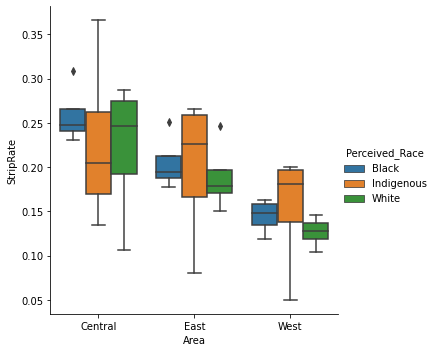

In [ ]:
sns.catplot(data=sample_df, kind="box", x="Area", y="StripRate", hue='Perceived_Race')

In [ ]:
# Ensure each test group has same population
sample_df.groupby(['Area','Perceived_Race'])['Area'].count().reset_index(name="Num")

,Area,Perceived_Race,Num
0,Central,Black,4
1,Central,Indigenous,4
2,Central,White,4
3,East,Black,4
4,East,Indigenous,4
5,East,White,4
6,West,Black,4
7,West,Indigenous,4
8,West,White,4


In [ ]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Performing two-way ANOVA
model = ols('StripRate ~ C(Perceived_Race) + C(Area) + C(Perceived_Race):C(Area)', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Perceived_Race),0.003435,2.0,0.462739,0.634457
C(Area),0.054285,2.0,7.313028,0.002897
C(Perceived_Race):C(Area),0.001803,4.0,0.121444,0.973604
Residual,0.100211,27.0,NaN,NaN


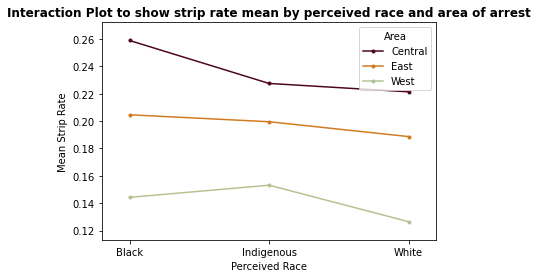

In [ ]:

from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Create interaction plot
fig = interaction_plot(x=sample_df['Perceived_Race'], trace=sample_df['Area'], response=sample_df['StripRate'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.ylabel('Mean Strip Rate')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show strip rate mean by perceived race and area of arrest', fontweight='bold')
plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Perform multiple pairwise comparison (Tukey HSD)
turkey = pairwise_tukeyhsd(endog=sample_df['StripRate'], groups=sample_df['Area'], alpha=0.05)
print(turkey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Central   East  -0.0383 0.2361 -0.0949  0.0183  False
Central   West  -0.0946  0.001 -0.1512 -0.0379   True
   East   West  -0.0563 0.0517 -0.1129  0.0004  False
-----------------------------------------------------


In [ ]:
# Perform multiple pairwise comparison (Tukey HSD)
turkey = pairwise_tukeyhsd(endog=sample_df['StripRate'], groups=sample_df['Perceived_Race'], alpha=0.05)
print(turkey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
     Black Indigenous  -0.0092    0.9 -0.0781 0.0597  False
     Black      White  -0.0237 0.6665 -0.0927 0.0452  False
Indigenous      White  -0.0145 0.8529 -0.0835 0.0544  False
-----------------------------------------------------------


## **Methodology One Way ANOVA**

In [ ]:
# Select columns for analysis
join1= join[["Area","StripRate"]]
join1.head()

,Area,StripRate
0,West,0.139651
1,West,0.196078
2,West,0.133190
3,West,0.162935
4,West,0.166667


In [ ]:
join.groupby(['Area'])['Area'].count().reset_index(name="Num")

,Area,Num
0,Central,21
1,East,15
2,West,15


In [ ]:
# Sample data
sample_df1 = join1[['Area','StripRate']].groupby(['Area']).apply(lambda x: x.sample(n=10)).reset_index(drop=True)
sample_df1.head()

,Area,StripRate
0,Central,0.365854
1,Central,0.308550
2,Central,0.285714
3,Central,0.230769
4,Central,0.244681


In [ ]:
# Ensure each test group has same population
sample_df1.groupby(['Area'])['Area'].count().reset_index(name="Num")

,Area,Num
0,Central,10
1,East,10
2,West,10


In [ ]:
# Conduct One Way AnoVA
mod1=ols("StripRate~Area",data=sample_df1).fit()

In [ ]:
aov_table1=sm.stats.anova_lm(mod1, type=2)
print(aov_table1)

            df    sum_sq   mean_sq         F    PR(>F)
Area       2.0  0.037250  0.018625  5.875385  0.007614
Residual  27.0  0.085591  0.003170       NaN       NaN


In [ ]:
# Perform multiple pairwise comparison (Tukey HSD)
tukey1 = pairwise_tukeyhsd(endog=sample_df1['StripRate'], groups=sample_df1['Area'], alpha=0.05)
print(tukey1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
Central   East  -0.0317 0.4308 -0.0942 0.0307  False
Central   West  -0.0854 0.0059 -0.1478 -0.023   True
   East   West  -0.0536 0.1024 -0.1161 0.0088  False
----------------------------------------------------


# **Research Question2: Does race influence items found rate during a strip search? (One-Way ANOVA)**

## **Preprocessing and Data Cleaning**

In [ ]:
data = pd.read_excel("/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).xlsx")

In [ ]:
data.columns = ["Arrest_Year","Arrest_Month","EventID","ArrestID","PersonID","Perceived_Race","Sex","Age_group__at_arrest_","Youth_at_arrest__under_18_years","ArrestLocDiv","StripSearch","Booked","Occurrence_Category","Actions_at_arrest___Concealed_i","Actions_at_arrest___Combative__","Actions_at_arrest___Resisted__d","Actions_at_arrest___Mental_inst","Actions_at_arrest___Assaulted_o","Actions_at_arrest___Cooperative","SearchReason_CauseInjury","SearchReason_AssistEscape","SearchReason_PossessWeapons","SearchReason_PossessEvidence","ItemsFound","ObjectId"]
data.style.hide_index()
data=data.drop([0])
data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
1,2020,July-Sept,1005907,6017884,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
2,2020,July-Sept,1014562,6056669,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
3,2020,Oct-Dec,1029922,6057065,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
4,2021,Jan-Mar,1052190,6029059,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
5,2021,Jan-Mar,1015512,6040372,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
data= data[["Perceived_Race","ArrestLocDiv","ItemsFound","StripSearch"]]
data.head()

,Perceived_Race,ArrestLocDiv,ItemsFound,StripSearch
1,White,54,NaN,0
2,White,54,NaN,0
3,Unknown or Legacy,54,NaN,0
4,Black,XX,NaN,0
5,South Asian,XX,NaN,0


In [ ]:
data["ArrestLocDiv"].unique()

array([54, 'XX', 42, 52, 14, 51, 53, 31, 11, 12, 13, 41, 22, 55, 43, 23,
       33, 32], dtype=object)

In [ ]:
data = data[(data["ArrestLocDiv"]!='XX')]

In [ ]:
race= ['White','Black','Indigenous']
data = data[data['Perceived_Race'].isin(race)]

In [ ]:
data.head()

,Perceived_Race,ArrestLocDiv,ItemsFound,StripSearch
1,White,54,NaN,0
2,White,54,NaN,0
7,Black,52,NaN,0
10,Black,14,NaN,0
11,Black,51,NaN,0


In [ ]:
data['ItemsFound'] = data['ItemsFound'].fillna(0)

In [ ]:
data.head()

,Perceived_Race,ArrestLocDiv,ItemsFound,StripSearch
1,White,54,0,0
2,White,54,0,0
7,Black,52,0,0
10,Black,14,0,0
11,Black,51,0,0


In [ ]:
#Determine number of strip search by police division and race
Num_StripResearch=data.groupby(['ArrestLocDiv','Perceived_Race'])['StripSearch'].sum().reset_index(name="Num_Strip")
Num_StripResearch.head()

,ArrestLocDiv,Perceived_Race,Num_Strip
0,11,Black,56
1,11,Indigenous,10
2,11,White,124
3,12,Black,131
4,12,Indigenous,8


In [ ]:
#Determine number of items found by police division and race
itemfound=data.groupby(['ArrestLocDiv','Perceived_Race'])['ItemsFound'].sum().reset_index(name="Num_ItemFound")
itemfound.head()

,ArrestLocDiv,Perceived_Race,Num_ItemFound
0,11,Black,26
1,11,Indigenous,2
2,11,White,60
3,12,Black,51
4,12,Indigenous,5


In [ ]:
# Combine two tables
combine=pd.merge(Num_StripResearch,itemfound)
combine.head(100)

,ArrestLocDiv,Perceived_Race,Num_Strip,Num_ItemFound
0,11,Black,56,26
1,11,Indigenous,10,2
2,11,White,124,60
3,12,Black,131,51
4,12,Indigenous,8,5
5,12,White,109,47
6,13,Black,31,10
7,13,Indigenous,7,3
8,13,White,67,29
9,14,Black,181,51


In [ ]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ArrestLocDiv    51 non-null     int64 
 1   Perceived_Race  51 non-null     object
 2   Num_Strip       51 non-null     object
 3   Num_ItemFound   51 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
# Calculate Item Found Rate
combine["ItemFoundRate"]= combine["Num_ItemFound"].div(combine["Num_Strip"])
combine.head()

,ArrestLocDiv,Perceived_Race,Num_Strip,Num_ItemFound,ItemFoundRate
0,11,Black,56,26,0.464286
1,11,Indigenous,10,2,0.2
2,11,White,124,60,0.483871
3,12,Black,131,51,0.389313
4,12,Indigenous,8,5,0.625


In [ ]:
# Sample data
sample_data = combine[['Perceived_Race','ItemFoundRate']].groupby(['Perceived_Race']).apply(lambda x: x.sample(n=5)).reset_index(drop=True)

In [ ]:
sample_data

,Perceived_Race,ItemFoundRate
0,Black,0.322581
1,Black,0.281768
2,Black,0.26087
3,Black,0.514056
4,Black,0.266667
5,Indigenous,0.340909
6,Indigenous,0.555556
7,Indigenous,0.2
8,Indigenous,0.461538
9,Indigenous,0.428571


In [ ]:
l1 = sample_data.query('Perceived_Race == "White"')['ItemFoundRate']
l2 = sample_data.query('Perceived_Race == "Black"')['ItemFoundRate']
l3 = sample_data.query('Perceived_Race == "Indigenous"')['ItemFoundRate']

In [ ]:
#p > 0.05 can assume equal variance
stat, p = levene(l1,l2,l3)
print(stat, p)

0.5934200001874327 0.5678623239885726


In [ ]:
# Checke the variance of the three groups
[np.var(x, ddof=1) for x in [l1, l2, l3]]

[0.0035979448132571305, 0.011261225990004457, 0.01806413164172072]

In [ ]:
#H0: there is no significant difference in item found rate and race
#H1: there is difference in item found rate and race

In [ ]:
# t test for H0: there is no difference in item found rate and race
stats.ttest_ind(combine['ItemFoundRate'][combine['Perceived_Race'] == 'White'],
                combine['ItemFoundRate'][combine['Perceived_Race'] == 'Black'])

In [ ]:
# t test for H0: there is no difference in item found rate rate and race
stats.ttest_ind(combine['ItemFoundRate'][combine['Perceived_Race'] == 'White'],
                combine['ItemFoundRate'][combine['Perceived_Race'] == 'Indigenous'])

Ttest_indResult(statistic=0.12556607154788518, pvalue=0.9008609992019359)

In [ ]:
# t test for H0: there is no difference in item found rate and race
stats.ttest_ind(combine['ItemFoundRate'][combine['Perceived_Race'] == 'Indigenous'],
                combine['ItemFoundRate'][combine['Perceived_Race'] == 'Black'])

Ttest_indResult(statistic=0.18481968409555044, pvalue=0.8545368536963485)

## **Exploratory Data Analysis**

In [ ]:
# Sample data
sample_data = combine[['Perceived_Race','ItemFoundRate']].groupby(['Perceived_Race']).apply(lambda x: x.sample(n=10)).reset_index(drop=True)

In [ ]:
sample_data['ItemFoundRate'] = pd.to_numeric(sample_data['ItemFoundRate']) 

In [ ]:
sample_data.info()

Text(0, 0.5, 'Frequency')

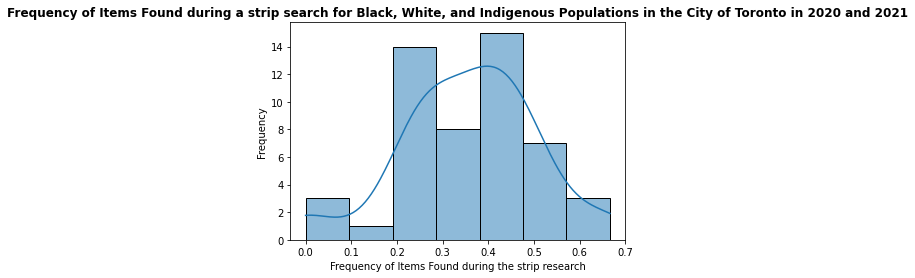

In [ ]:
# Create histogram
sns.histplot(data=combine, x='ItemFoundRate', kde='True')
plt.title('Frequency of Items Found during a strip search for Black, White, and Indigenous Populations in the City of Toronto in 2020 and 2021', fontweight='bold')
plt.xlabel('Frequency of Items Found during the strip research')
plt.ylabel('Frequency')

In [ ]:
# Determine skew of item found rate
combine.skew()
## Strip rate is approximately symmetrical because skewness is between -0.5 and 0.5

<ipython-input-257-fbdc311182f5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combine.skew()


ArrestLocDiv    -0.153797
Num_Strip        2.485048
Num_ItemFound    3.228991
ItemFoundRate   -0.360546
dtype: float64

In [ ]:
combine.head()

Text(6.799999999999997, 0.5, 'Item Found Rate')

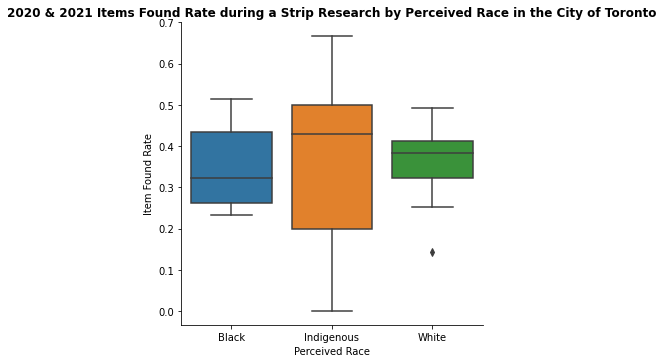

In [ ]:
# Create box plot
sns.catplot(data=combine, kind="box", x="Perceived_Race", y="ItemFoundRate")
plt.title('2020 & 2021 Items Found Rate during a Strip Research by Perceived Race in the City of Toronto', fontweight='bold')
plt.xlabel('Perceived Race')
plt.ylabel('Item Found Rate')

##**Methodology One-Way ANOVA**

In [ ]:
#H0 There is no sig difference in items found rate accross the race 
#H1 There is sig difference in items found rate accross the race 
mod=ols("ItemFoundRate~Perceived_Race",data=sample_data).fit()

In [ ]:
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)

                  df    sum_sq   mean_sq         F    PR(>F)
Perceived_Race   2.0  0.035542  0.017771  0.642912  0.533619
Residual        27.0  0.746325  0.027642       NaN       NaN


In [ ]:
pair_t=mod.t_test_pairwise("Perceived_Race")
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Indigenous-Black,-0.079394,0.074353,-1.067801,0.295065,-0.231953,0.073165,0.649694,False
White-Black,-0.015125,0.074353,-0.203418,0.840334,-0.167684,0.137435,0.840334,False
White-Indigenous,0.064269,0.074353,0.864384,0.394992,-0.088290,0.216829,0.649694,False


In [ ]:
# Perform multiple pairwise comparison (Tukey HSD)
turkey = pairwise_tukeyhsd(endog=sample_data['ItemFoundRate'], groups=sample_data['Perceived_Race'], alpha=0.05)
print(turkey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
     Black Indigenous  -0.0794 0.5407 -0.2637 0.1049  False
     Black      White  -0.0151    0.9 -0.1994 0.1692  False
Indigenous      White   0.0643 0.6568   -0.12 0.2486  False
-----------------------------------------------------------
